## Generating dataset

In [1]:
import cv2

In [2]:
import cv2
def generate_dataset():
    face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    def face_cropped(img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)
         
        if faces is ():
            return None
        for (x,y,w,h) in faces:
            cropped_face = img[y:y+h,x:x+w]
        return cropped_face
     
    cap = cv2.VideoCapture(1)
    img_id = 0
     
    while True:
        ret, frame = cap.read()
        if face_cropped(frame) is not None:
            img_id+=1
            face = cv2.resize(face_cropped(frame), (200,200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            #file_name_path = "data/"+"Ishwar."+str(img_id)+".jpg"
            file_name_path = "Images for visualization/"+str(img_id)+'.jpg'
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2 )
             
            cv2.imshow("Cropped_Face", face)
            if cv2.waitKey(1)==13 or int(img_id)==20:
                break
                 
    cap.release()
    cv2.destroyAllWindows()
    print("Collecting samples is completed !!!")
#generate_dataset()

<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\sumit\AppData\Local\Temp\ipykernel_13208\1079156034.py:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


## Create a label

In [3]:
# A numpy module can be used to create a label. In this part, we just need to convert the user name into a numpy array.
import numpy as np # pip install numpy

In [4]:

def my_label(image_name):
    name = image_name.split('.')[-3] 
    #suppose your dataset contains two person
#     if name=="Ishwar":
#         return np.array([1,0])
#     elif name=="Manish":
#         return np.array([0,1])
     
     
    # suppose your dataset contains three person
    if name=="Ishwar":
        return np.array([1,0,0])
    elif name=="Shivanshu":
        return np.array([0,1,0])
    elif name=="Bijay":
        return np.array([0,0,1])

## Create data

In [5]:
# This part involves creating data from images. OpenCV can be used for this purpose. Also, we need to divide our data into training and testing parts.
import os
from random import shuffle
from tqdm import tqdm


In [6]:
def my_data():
    data = []
    for img in tqdm(os.listdir("data")):
        path=os.path.join("data",img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        data.append([np.array(img_data), my_label(img)])
    shuffle(data)  
    return data

In [7]:
data = my_data()

100%|█████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<00:00, 871.45it/s]


In [8]:

train = data[:2400]  
test = data[2400:]
X_train = np.array([i[0] for i in train]).reshape(-1,50,50,1)
print(X_train.shape)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1,50,50,1)
print(X_test.shape)
y_test = [i[1] for i in test]

(69, 50, 50, 1)
(0, 50, 50, 1)


## Create the model

In [9]:
# This part involves creating a model with tflearn. The convolutional neural network plays a major role in creating a model. We utilize a ReLU activation layer.
# import warnings
# warnings.filterwarnings('ignore')
 
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression


AttributeError: module 'tensorflow.core.function.trace_type' has no attribute 'Serializable'

## Let’s visualize the data and make a prediction

In [10]:
#Nowvisu alize our data and make a prediction. Our model should identify authorized users.
def data_for_visualization():
    Vdata = []
    for img in tqdm(os.listdir("Images for visualization")):
        path = os.path.join("Images for visualization", img)
        img_num = img.split('.')[0] 
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        Vdata.append([np.array(img_data), img_num])
    shuffle(Vdata)
    return Vdata

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 990.16it/s]


NameError: name 'model' is not defined

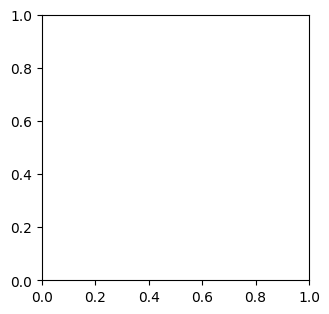

In [11]:
Vdata = data_for_visualization()
import matplotlib.pyplot as plt   # installation command: pip install matplotlib
 
fig = plt.figure(figsize=(20,20))
for num, data in enumerate(Vdata[:20]):
    img_data = data[0]
    y = fig.add_subplot(5,5, num+1)
    image = img_data
    data = img_data.reshape(50,50,1)
    model_out = model.predict([data])[0]
     
    if np.argmax(model_out) == 0:
        my_label = 'Ishwar'
    elif np.argmax(model_out) == 1:
        my_label = 'Manish'
    else:
        my_label = 'Bijay'
         
    y.imshow(image, cmap='gray')
    plt.title(my_label)
     
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()